### Introduction to Scikit-Learn

Illustrates the most useful functions of the scikitlearn 

What we cover:
0. An end to end Scikit-Learn workflow
1. Get the data ready
2. Choose correct model
3. Fit model and make predictions
4. Evaluate model
5. Improve model
6. Save/Load model
7. Put it together


### 0. An end to end SK Learn Workflow

In [3]:
#1. Get the data ready
import pandas as pd
import numpy as np
import seaborn as sns
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#Create X (feature matrix)
x= heart_disease.drop("target", axis=1)

#Create y (labels)
y = heart_disease["target"]

In [5]:
#Chose the right model and hypermarameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

#Use default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
#Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

NameError: name 'x' is not defined

In [10]:
clf.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [6]:
y_preds = clf.predict(x_test)

In [7]:
y_preds

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [8]:
y_test

54     1
45     1
285    0
234    0
102    1
      ..
87     1
296    0
278    0
240    0
196    0
Name: target, Length: 61, dtype: int64

In [9]:
#4. Evaulate the model
clf.score(x_train, y_train)

1.0

In [10]:
clf.score(x_test, y_test)

0.8360655737704918

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [4]:
confusion_matrix(y_test, y_preds)

NameError: name 'confusion_matrix' is not defined

In [5]:
accuracy_score(y_test, y_preds)

NameError: name 'accuracy_score' is not defined

### 

In [ ]:
# #5. Improve a model
# #Try diffrent amount of n_estimators

# np.random.seed(42)

# for i in range(10,10,10):
#     print(f"Trying model {i} estimators...")
#     clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
#     print(f"Model accuracy on testset: {clf.score(x_test, y_test)*100:.2f}")

In [ ]:
#Save  a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

##1. Getting our data ready to be used with ML

Three main things we have to do:
1) Split the data into features and labels (usually x and y)
2. Filling(also called imputing) or disregarding missing values
3) Convert non numerical values to numerical values( also called feature encoding)

In [ ]:
x = heart_disease.drop("target", axis=1)
x.tail()

In [ ]:
y = heart_disease["target"]
y.tail()

In [ ]:
#Split the data into test and train set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
np.shape(x_train)

In [ ]:
len(heart_disease)

#### 1.1 Make sure its all numerical

In [ ]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

In [ ]:
#Split the data features and target
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
#Convert String to Numerical data.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model  = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)


In [ ]:
#Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_x = transformer.fit_transform(x)
pd.DataFrame(transformed_x)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.tail()

In [ ]:
#Lets refit the model

np.random.seed(42)
x_train, x_test, y_train, y_test= train_test_split(transformed_x, y, test_size = 0.2)

model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

####1.2 What if there are missing values?
1. FIll them with some value ( also known as imputation).
2. Remove the samples with missing data altogether.


In [ ]:
#Import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [ ]:
car_sales_missing.isna().sum()

In [6]:
#Lets try and compare our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_x = transformer.fit_transform(x)
pd.DataFrame(transformed_x)

ValueError: A given column is not a column of the dataframe

### Fill missing data with Pandas

In [ ]:
# FIll the "Make" column
#As it is categorical data, just dfill it with data that is says missing

car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fill the door column with the average value of 4

car_sales_missing["Doors"].fillna(4, inplace=True)

In [ ]:
#Check our dataframe again

car_sales_missing.isna().sum()

In [ ]:
#Remove rows with missing Price value

car_sales_missing.dropna(inplace=True)

In [ ]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
#Lets try and compare our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_x = transformer.fit_transform(x)
pd.DataFrame(transformed_x)

### Option 2: Fill missing data with SciKitLearn

Data sets are filled by first splititng and transforming the data into training and test sets seperately.

Split your data first(into train/test)
Fill/transform the training set and test sets sperately.

In [ ]:
car_sale_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [ ]:
car_sale_missing.isna().sum()

In [ ]:
#Split into x and y 

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
#Fill missing values with SKL
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
#Fill categorical values wth missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

#Define coloumns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
numerical_features = ["Odometer (KM)"]

#Create an imputer(something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("numerical_imputer", numerical_imputer, numerical_features)
])


#Transform the data
filled_x = imputer.fit_transform(x)
filled_x

In [ ]:
car_sales_filled = pd.DataFrame( filled_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [ ]:
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

In [ ]:
#NOw we vgot our data as number anf filled
#Lets fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

#2 Choosing the right estimator/algorithm for your problem

Some things to note:
    Sklearn refers to machine leanring models, algorithmsa s estimators.
    Classification problem- predictiong cateogry
    clf = classifier
Regression - predicting a number

### 2.1 Picking a learning model for a regression problem

In [10]:
#Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Import algorithm
#Setup random seed

np.random.seed(42)

#Create the data

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

In [ ]:
#Split into traina nd test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

In [ ]:
from sklearn.linear_model import Lasso
model_2 = Lasso()
model_2.fit(x_train, y_train)
model_2.score(x_test, y_test)

In [ ]:
#Lets try another regression,

#Ensemble Model:
    #Combinations of other models to improve prediction.
    #We use DecisioTree and RandomForest

In [ ]:
#import the RandomForestRegressor modedl class from ensemble module

from sklearn.ensemble import RandomForestRegressor

#Setup a seed
np.random.seed(42)

#Create the data
x  = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

model.score(x_test, y_test)

## 2.2 Choosing an estimator for a classification problem


In [ ]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

In [ ]:
#Using Linear SVC for multi-class classification, using Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#Setup random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instiate LinearSVC
clf = LinearSVC(max_iter=100000)
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
#LinearSVC not working so we use Ensemble Classifier using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Setup random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

Tidbit:
1) **If you have structured data, use ensemble methods**

2) **If you have unstructured data, use deep learning or transfer learning.**

### Fitting a model to data to make predictions

### 3.1 Fitting the model to the data

Different names for:
*'X' = features
*'Y' = Labels

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Setup random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instiate LinearSVC
clf = RandomForestClassifier()

#Fit the model to data.
clf.fit(x_train, y_train)

#Test the data.
clf.score(x_test, y_test)

In [ ]:
x.head()

In [ ]:
y.head()

### 3.2 Make predictions using a machine learning model.

#### Using the predict functions. predict()
#### Using the predict_proba()

In [ ]:
# Use the trained model t make predicitions.
clf.predict(np.array([1,7,3,4,6,7])) #We need to feed the model the same format of data.



In [ ]:
x_test

In [ ]:
#This predicts the target from the label within the test data.
clf.predict(x_test)

In [ ]:
np.array(y_test)

In [ ]:
#Compare predictions to truth labels to evaluate the model.
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test) #Checking the number of predictions vs actual and taking the mean of this value.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

Make predictions using predict_proba()

In [ ]:
#predict_proba() returns probabilities of a classificaiton model.

clf.predict_proba(x_test[:5]) #So the program finds the probabilit of labeling the features as 
                                #either one label or the other.


In [ ]:
clf.predict(x_test[:5])

In [ ]:
#Making predictions for regression.

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Create model isntance
model = RandomForestRegressor()

#Fit the model to the data.
model.fit(x_train, y_train)

#Make predictions

y_pred = model.predict(x_test)


In [ ]:
y_pred[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
#To make a model, we can take the reduced chi-squared for the data.

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

#On average our models predcitions are 0.3267 away from the actual.

In [ ]:
housing_df["target"]

## 4. Evaluating the ML model

Three ways to evaluate SKL models/estimators:

    1. Estimator's bilt in 'score()' method    
    2. Scoring parameters
    3. Problem-specific metric functions.
    
Read more here: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating moddel with score method.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn
np.random.seed(42)

#Create x,y
heart_disease

In [11]:
#Create x, y

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Intiate RandomFOrest
clf = RandomForestClassifier(n_estimators=1400)

clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1400)

In [ ]:
clf.score(x_train, y_train)
#The score is one because the algoirthm has already seen the training data.
#Highest value = 1.0 lowest = 0.0

In [ ]:
clf.score(x_test, y_test)
#For samples the model has not seen before.

Lets use the score method in our regression problem..

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Create model isntance
model = RandomForestRegressor(n_estimators=100)

#Fit the model to the data.
model.fit(x_train, y_train)


In [ ]:
model.score(x_test, y_test)
#Using the R^2 value, for regression algorithms, within a range of 0-1.

In [ ]:
y_test.mean()

### Using the Scoring Parameters.


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#Setup random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instiate LinearSVC
clf = RandomForestClassifier()

#Fit the model to data.
clf.fit(x_train, y_train)

#Test the data.
clf.score(x_test, y_test)

0.8524590163934426

In [7]:
clf.score(x_test, y_test)

0.8524590163934426

In [8]:
cross_val_score(clf, x, y, cv=5)
#Array of 5 different scores, score returns a single number.
#What does cross validation do?

#Cross validation uses diffrent sets of training and test data i.e. uses diffrent segments and then, tests this to score
#obtains the score. I.e. uses diffrent splits and trainss 5 diffrent models wiht 5 diffrent versions of test data.

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [9]:
#Average is a more accurate score of the data.
np.average(cross_val_score(clf, x, y, cv=10))

0.8280645161290323

In [10]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(x_test, y_test)

#Take the meanof the 5-fold cross-validation score.

clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [11]:
#Scoring parameter set to None by default,
#Default scoring parameter of classifier = mean accuracy.
#Scoring parameter can be changed.
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classificaito report

**Accuracy score**

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv=5)



In [13]:
np.mean(cross_val_score) #Gives mean accuracy of model

0.8248087431693989

In [14]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score)*100} %")

Heart Disease Classifier Accuracy: 82.48087431693989 %


In [15]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Area under the ROC curve**

Area under the receiver operating charactersitc curve(AUC/ROC)
* Area under curve(AUC)
* Roc curve

ROC curve are a ccomparision of a model's true positive rate (tpr) versus a models false positive (fpr).

* tpr: model predicts one if truth is 1
* fpr: model predicts one if truth is 0.
* True negative: model predicts 0 if truth is 0.
* False negative: model predicts 0 if truth is 1.


In [16]:
#Create x_test, etc

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [17]:
from sklearn.metrics import roc_curve

clf.fit(x_train, y_train)
#Make predictions with probabilities.

y_probs = clf.predict_proba(x_test)

y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [18]:
#Calcuate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [19]:
#Check the false positive rates:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [20]:
#Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model.
    """
    #Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    
    plt.plot([0,1], [0,1], color="blue", linestyle="--", label="Guessing")
    plt.show()

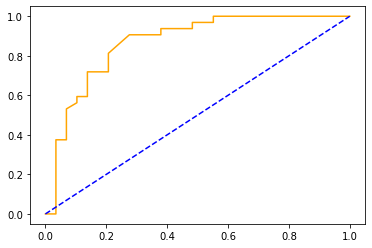

In [21]:
plot_roc_curve(fpr,tpr)

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

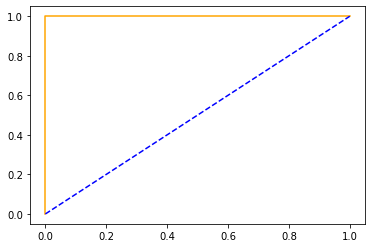

In [23]:
#plot perfect ROC curve and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

## Confusion Matrix

**Confusion Matrix

A confusion matrix is a quick way to compare the labels and the actual labels it was suposed to predict.
In essense, gives an idea of where the model is getting confused.

In [24]:
from sklearn.metrics import confusion_matrix

y_preds  = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [25]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Lables"],
            colnames=["Predicted_labels"])

Predicted_labels,0,1
Actual Lables,,
0,23,6
1,6,26


I.e. if predicted label is 0 and the actual label is 1 then the model is getting the value wrong. OR false positive, this is where
the model is getting the classification wrong.

In [26]:
#How to install a conda package into conda.
import sys 
!conda install --yes --prefix {sys.prefix} seaborn

'conda' is not recognized as an internal or external command,
operable program or batch file.


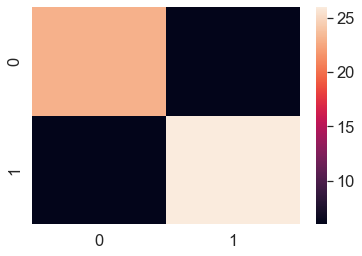

In [27]:

#Make our confusion matrix more visual using seaborn.

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

### Creating a confusion matrix using SKL

To create a new method confusion matrix using SKL 1.0

In [28]:
import sklearn
sklearn.__version__

'1.0.1'

In [21]:
!pip install --upgrade sklearn

^C


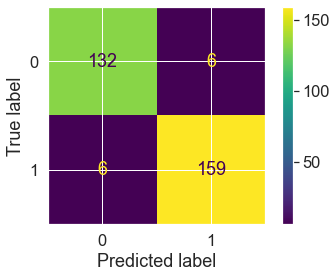

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

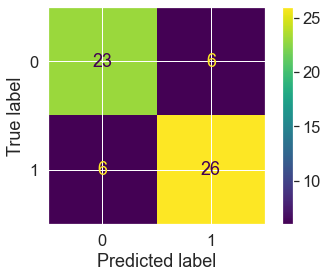

In [30]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds);

# Classification Report

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



What this is showing:
* Precision: The accuracy of the model, i.e. closer to 1 is better. 1- precision = false positive/false negative.
* Recall: % of actual positives,
* Support: #of metrics the values precision/recall is calculated on. 
* Accuracy: Accuracy of model.
* Macro avg: Class imbalance: if there are more 0/1 split then the model can maybe be good at only a certain classifcation.
* Weighted avg: takes into account the weighting of each class for accuracy.

In [35]:
disease_true = np.zeros(10000)
disease_true[0] =1

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\aavas\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aavas\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aavas\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Although our model is 99% accurate, it doesnt succed at predicting 1.0 which means that it is bad at actually predicting 1.0

###  Regrission model evaluation metrics

* We measure R^" - COEFFICIENT OF DETERMINATION
* Mean abs error (MAE)
* Mean squared error (MSE)

In [41]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
model.score(x_test, y_test) #Returns the R^2
#how much of the target variable can it be predicted from the feature variable.


0.8065734772187598

In [45]:
y_test.mean()

2.0550030959302275

In [47]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [49]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)
#This shouldve give the lowest R^2

0.0

### MSE/MAE

In [50]:
#MAE

from sklearn.metrics import mean_absolute_error
#Average of the absoulte diffrences between the preds and actual values.

In [53]:
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae
#On average each one of our predictions are 0.3265 far away, we want MAE to be as low as 

0.32659871732073664

In [57]:
#Mean Square error (Kind of like chi-squared)

from sklearn.metrics import mean_squared_error
y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

# Finally using the scoring parameter

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [60]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None) #If scoring is none

In [61]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [65]:
#Cross-validated accuracy
print("The cross-validated accuracy is",np.mean(cv_acc)*100)

The cross-validated accuracy is 82.48087431693989


In [72]:
#Precision: classes are imbalanced. Porption of false posiitives.

cv_precision = cross_val_score(clf, x,y, cv=5, scoring="precision")
cv_precision

array([0.78947368, 0.90625   , 0.82758621, 0.8125    , 0.76315789])

In [73]:
#Cross validated: precision.
np.mean(cv_precision)

0.8197935571687841

In [75]:
#Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [76]:
#Cross validated recall,
print(f"The cross-validated recall is: {np.mean(cv_precision)}")

The cross-validated recall is: 0.8197935571687841


Let's see the `scoring` parameterusing a regression problem..

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [81]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [83]:
#Mean sq error

cv_mse = cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [84]:
#Mean abs error
cv_mae = cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

### Evaluating SKL models using metric functions.

#Using sklmean.metrics module is used to evaluate the models.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
#Create x and y,
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Fit model:
clf = RandomForestClassifier()

clf.fit(x_train, y_train)

#Evaluate the models,
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, clf.predict(x_test))}")
print(f"Precision: {precision_score(y_test, clf.predict(x_test))}")
print(f"Recall: {recall_score(y_test, clf.predict(x_test))}")
print(f"F1: {f1_score(y_test, clf.predict(x_test))}")

Classifier metrics on the test set
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#Create x and y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()

model.fit(x_train, y_train)

y_preds = model.predict(x_test)

#Evaluate model using eval functions

print("Regression metrics on test set")
print(f"R2 Score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on test set
R2 Score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


# Improving the model

First predictions = Baseline predictions, 
FIrst model = Baseline model

From a data prespective, 
* Could we collect more data?
* Could we improve our data?

From a model prespective.
* Is there a better model?
* Can we improve the models- hyperparameters?

Parameters - model find these patterns in data
* Hyperparameters = settings a model you can adjust to potentially improve its ability to find patterns.

Three ways to adjust hyperparameters.
1. By hand
2. Randomly using RandomSearchCV
3. Exhaustively using GridCV

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [19]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning by hand

We 10-15% on validation split (which is used for hyperparameter tuning)
We make 3 sets, training, validation and split.

In [21]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [35]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict
    

In [39]:
from sklearn.ensemble import RandomForestClassifier

#Shuffle the data

heart_disease_shuffled = heart_disease.sample(frac=1) #Shuffled

#Split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split the data into train, validation and test sets

train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split + 0.15* len(heart_disease_shuffled))

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#Baseline predicts
y_preds = clf.predict(x_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 80.00%
Precision: 0.85
Recall: 0.82
F1 score: 0.84


In [25]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
#Lets try and change the hyper parameters
np.random.seed(42)

#Create a second classifier with diffrent hyperparameters.
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

#Make preds
y_preds_2 = clf_2.predict(x_valid)

#Evaluate
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 84.44%
Precision: 0.89
Recall: 0.86
F1 score: 0.87


In [ ]:
clf_3 = RandomForestClassifier(n_estimators=100,
                              )